<a href="https://colab.research.google.com/github/ArkadyBIG/AlgorithmsLabs/blob/master/Lab1_SM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
from sklearn.metrics import mean_squared_error

In [2]:
data_str = open('/content/f10.txt').read().split()

In [3]:
measurments = np.array(data_str, float)

In [4]:
def fourier_transform(x):
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x) / N

In [18]:
class Model: 
  def __init__(self, data, T, dt):
    self.data = data
    self.T = T
    self.dt = dt    
    self.time = np.arange(0, T + dt, dt)
    self.n = self.time.shape[0]

  def fourier_transform_data(self):
    return np.abs(fourier_transform(self.data))
  
  def find_frequencies(self, transformed_data):
    transformed_half = transformed_data[:transformed_data.shape[0] // 2 - 1]
    extremums = np.array(argrelextrema(transformed_half, np.greater, mode='wrap'))
    extremums = np.array([[e for e in extremums[0] if e > 1]])
    return extremums/np.int(self.T)

  def find_params(self, frequencies):
    b = np.array([np.sum(self.data * self.time ** 3), 
                  np.sum(self.data * self.time ** 2), 
                  np.sum(self.data * self.time),
                  np.sum(self.data * np.sin(2. * np.pi * frequencies[0][0] * self.time)), 
                  np.sum(self.data * np.sin(2. * np.pi * frequencies[0][1] * self.time)), 
                  np.sum(self.data)])

    a = np.zeros((b.shape[0], b.shape[0]))

    self.functions = [self.time ** 3, 
                      self.time ** 2, 
                      self.time, 
                      np.sin(2. * np.pi * frequencies[0][0] * self.time), 
                      np.sin(2. * np.pi * frequencies[0][1] * self.time), 
                      np.ones(self.n)]

    for i in range(b.shape[0]):
        for j in range(b.shape[0]):
            a[i, j] = np.sum(self.functions[i] * self.functions[j])
    params = np.linalg.inv(a) @ b.T
    return params
  
  def calculate_func(self, params):
    return np.dot(params, self.functions)

  def caclulate_MSE(self, approximated_func):
    return mean_squared_error(self.data, approximated_func)

  def build_model(self):
    transformed_data = self.fourier_transform_data()
    plt.plot(transformed_data)
    plt.show()
    frequencies = self.find_frequencies(transformed_data)
    print('Frequencies:', frequencies)
    params = self.find_params(frequencies)
    print('Params:', params)
    result = self.calculate_func(params)
    plt.grid(True)
    plt.plot(self.time, result)
    mse = self.caclulate_MSE(result)
    print('MSE:', mse)


In [19]:
model = Model(measurments, 5, 0.01)

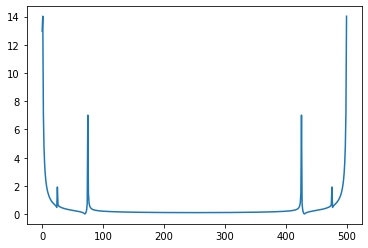

Frequencies: [[ 5. 15.]]
Params: [ 0.99999942 -0.99999558 -2.00000993  4.99999024 15.00000249 -4.99999412]
MSE: 6.567517132956691e-10


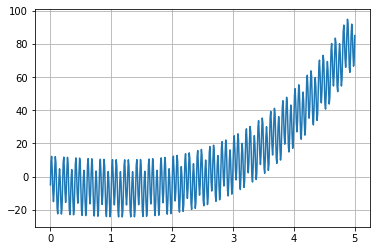

In [20]:
model.build_model()